# Lab 3: Policy Search

## Task

Write agents able to play [*Nim*](https://en.wikipedia.org/wiki/Nim), with an arbitrary number of rows and an upper bound $k$ on the number of objects that can be removed in a turn (a.k.a., *subtraction game*).

The player taking the last object wins.

* Task3.4: An agent using reinforcement learning

In [9]:
# Copied and adapted from
# https://towardsdatascience.com/hands-on-introduction-to-reinforcement-learning-in-python-da07f7aaca88


from nim_environment import NimBoard
from rl_agent import Agent
import matplotlib.pyplot as plt
from nim_utils import game_over, level_zero, pure_random, level_two, level_three, expert_strategy, Nimply

## **Reinforcement Learning**

In [2]:
def reinforcement_learning_nim(nim_size, strategy, robot=None):
    nim = NimBoard(nim_size)
    if robot is None:
        robot = Agent(nim, alpha=0.1, random_factor=0.4)
    moveHistory = []
    indices = []

    nim.display_board()
    print()
    
    players = ['agent', 'b']
    turn = 0

    for i in range(10_000):

        while not game_over(nim, players, turn):
            
            if players[turn] == "b":
                 ply = strategy(nim)
                 nim.nimming(ply)

            if players[turn] == "agent":
                state, _ = nim.get_state_and_reward()  # get the current state
                # choose an action (explore or exploit)
                action = robot.choose_action(state)
                nim.update_board(action)  # update the nim according to the action
                state, reward = nim.get_state_and_reward()  # get the new state and reward
                # update the robot memory with state and reward
                if state != (0, 0, 0):
                    robot.update_state_history(state, reward)
                if nim.steps > 1000:
                    # end the robot if it takes too long to find the goal
                    for idx in range(len(nim.rows)):
                        nim.rows[idx] = 0
            
            turn = (turn + 1) % 2
        state, reward = nim.get_state_and_reward(nim.winner == 0)
        robot.update_state_history(state, reward)

        robot.update_results(nim.winner == 0)
        robot.learn()  # robot should learn after every episode
        # get a history of number of steps taken to plot later
        if i % 50 == 0:
            print(f"{i}: {robot.get_avg_wins()}")
            moveHistory.append(robot.get_avg_wins())
            indices.append(i)
        nim = NimBoard(nim_size)  # reinitialize the nim

    plt.semilogy(indices, moveHistory, "b")
    plt.show()

    return robot


#### **Reinforce Agent with Nim(3)**

row[1]:  	| 
row[2]:  	| | | 
row[3]:  	| | | | | 

0: 0.0
50: 0.7843137254901961
100: 0.7821782178217822
150: 0.8145695364238411
200: 0.8557213930348259
250: 0.8685258964143426
300: 0.8704318936877077
350: 0.8689458689458689
400: 0.8603491271820449
450: 0.8603104212860311
500: 0.8622754491017964
550: 0.8656987295825771
600: 0.8735440931780366
650: 0.880184331797235
700: 0.8773181169757489
750: 0.8828229027962716
800: 0.8863920099875156
850: 0.8860164512338425
900: 0.8856825749167592
950: 0.8832807570977917
1000: 0.8831168831168831
1050: 0.8829686013320647
1100: 0.8828337874659401
1150: 0.8844483058210252
1200: 0.8867610324729392
1250: 0.8880895283772982
1300: 0.8885472713297463
1350: 0.8919319022945966
1400: 0.8915060670949322
1450: 0.8911095796002757
1500: 0.893404397068621
1550: 0.8961960025789814
1600: 0.89631480324797
1650: 0.8994548758328286
1700: 0.9024103468547913
1750: 0.9046259280411194
1800: 0.9056079955580233
1850: 0.9054565099945975
1900: 0.9074171488690163
1950: 0.9082521

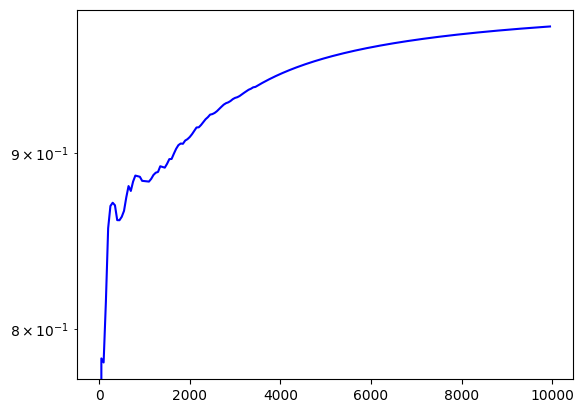

row[1]:  	| 
row[2]:  	| | | 
row[3]:  	| | | | | 

0: 1.0
50: 0.7843137254901961
100: 0.7128712871287128
150: 0.7483443708609272
200: 0.7661691542288557
250: 0.7689243027888446
300: 0.7541528239202658
350: 0.7521367521367521
400: 0.7581047381546134
450: 0.7627494456762749
500: 0.7664670658682635
550: 0.764065335753176
600: 0.7703826955074875
650: 0.7741935483870968
700: 0.7717546362339515
750: 0.7762982689747004
800: 0.7727840199750312
850: 0.7755581668625147
900: 0.7735849056603774
950: 0.7791798107255521
1000: 0.7782217782217782
1050: 0.774500475737393
1100: 0.7774750227066304
1150: 0.7749782797567333
1200: 0.7751873438800999
1250: 0.7777777777777778
1300: 0.776325903151422
1350: 0.7801628423390081
1400: 0.7837259100642399
1450: 0.7856650585802895
1500: 0.7894736842105263
1550: 0.7917472598323663
1600: 0.7938788257339163
1650: 0.7952755905511811
1700: 0.7960023515579071
1750: 0.7932609937178755
1800: 0.7956690727373681
1850: 0.7952458130740141
1900: 0.796422935297212
1950: 0.7960020

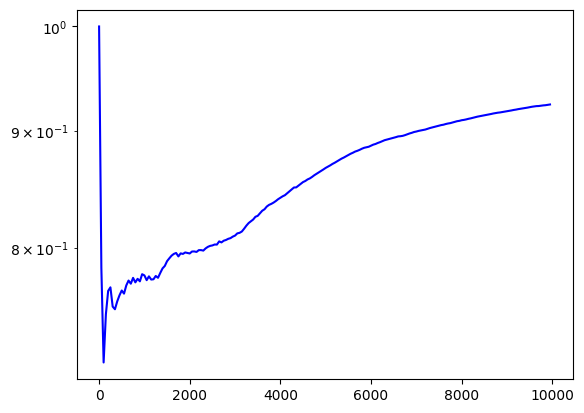

row[1]:  	| 
row[2]:  	| | | 
row[3]:  	| | | | | 

0: 0.0
50: 0.21568627450980393
100: 0.27722772277227725
150: 0.3841059602649007
200: 0.38308457711442784
250: 0.350597609561753
300: 0.38870431893687707
350: 0.39886039886039887
400: 0.42643391521197005
450: 0.4279379157427938
500: 0.4231536926147705
550: 0.4337568058076225
600: 0.43760399334442596
650: 0.44086021505376344
700: 0.44079885877318115
750: 0.4434087882822903
800: 0.44818976279650435
850: 0.45593419506462984
900: 0.46614872364039955
950: 0.47213459516298634
1000: 0.4675324675324675
1050: 0.47002854424357754
1100: 0.4713896457765668
1150: 0.48045178105994785
1200: 0.4870940882597835
1250: 0.4924060751398881
1300: 0.4980784012298232
1350: 0.5025906735751295
1400: 0.5096359743040685
1450: 0.5106822880771882
1500: 0.5076615589606929
1550: 0.5093488072211476
1600: 0.5128044971892567
1650: 0.5154451847365233
1700: 0.5185185185185185
1750: 0.5231296402055968
1800: 0.5263742365352582
1850: 0.5272825499729876
1900: 0.52866912151499

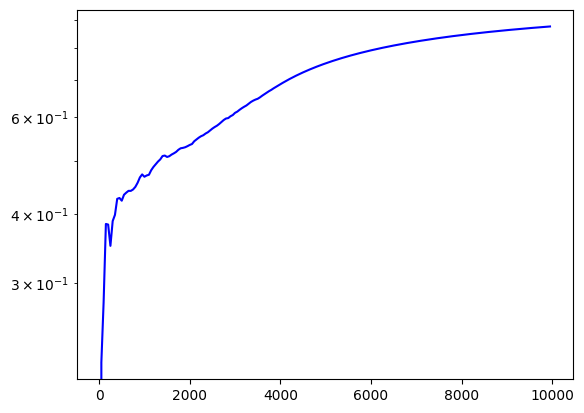

row[1]:  	| 
row[2]:  	| | | 
row[3]:  	| | | | | 

0: 0.0
50: 0.1568627450980392
100: 0.2376237623762376
150: 0.2847682119205298
200: 0.2537313432835821
250: 0.23107569721115537
300: 0.2591362126245847
350: 0.27635327635327633
400: 0.30673316708229426
450: 0.3237250554323725
500: 0.3373253493013972
550: 0.35208711433756806
600: 0.36605657237936773
650: 0.37327188940092165
700: 0.37945791726105566
750: 0.3821571238348868
800: 0.3920099875156055
850: 0.39600470035252644
900: 0.4051054384017758
950: 0.4058885383806519
1000: 0.4045954045954046
1050: 0.4100856327307326
1100: 0.40962761126248864
1150: 0.41702867072111205
1200: 0.42048293089092426
1250: 0.41886490807354115
1300: 0.425826287471176
1350: 0.42709104367135453
1400: 0.430406852248394
1450: 0.4355616815988973
1500: 0.43837441705529645
1550: 0.44616376531270147
1600: 0.45034353529044346
1650: 0.46032707450030286
1700: 0.46502057613168724
1750: 0.4683038263849229
1800: 0.470294280955025
1850: 0.47163695299837927
1900: 0.477643345607

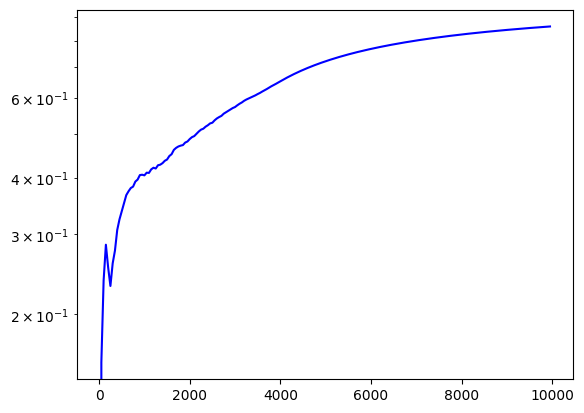

row[1]:  	| 
row[2]:  	| | | 
row[3]:  	| | | | | 

0: 0.0
50: 0.058823529411764705
100: 0.09900990099009901
150: 0.13245033112582782
200: 0.12935323383084577
250: 0.14741035856573706
300: 0.17275747508305647
350: 0.18803418803418803
400: 0.19201995012468828
450: 0.2017738359201774
500: 0.21357285429141717
550: 0.20689655172413793
600: 0.2096505823627288
650: 0.2119815668202765
700: 0.21540656205420827
750: 0.21837549933422104
800: 0.2209737827715356
850: 0.2256169212690952
900: 0.23196448390677027
950: 0.23764458464773922
1000: 0.23976023976023977
1050: 0.2407231208372978
1100: 0.24704813805631246
1150: 0.24847958297132927
1200: 0.23896752706078267
1250: 0.23661071143085532
1300: 0.24058416602613375
1350: 0.2457438934122872
1400: 0.2505353319057816
1450: 0.25430737422467264
1500: 0.25716189207195206
1550: 0.2572533849129594
1600: 0.2623360399750156
1650: 0.26408237431859477
1700: 0.2657260435038213
1750: 0.26898914905768134
1800: 0.27096057745696833
1850: 0.27282549972987574
1900: 0.2

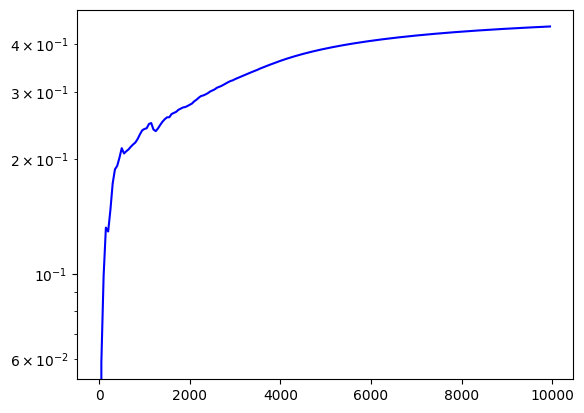

In [17]:
NIM_SIZE = 3
strategies = [level_zero, pure_random, level_two, level_three, expert_strategy]

reinforced_agent = None
for other_strategy in strategies:
    reinforced_agent = reinforcement_learning_nim(NIM_SIZE, other_strategy)

#### **Reinforce Agent with Nim(5)**

row[1]:  	| 
row[2]:  	| | | 
row[3]:  	| | | | | 
row[4]:  	| | | | | | | 
row[5]:  	| | | | | | | | | 

0: 0.0
50: 0.7843137254901961
100: 0.8217821782178217
150: 0.8079470198675497
200: 0.8407960199004975
250: 0.852589641434263
300: 0.8538205980066446
350: 0.8603988603988604
400: 0.8703241895261845
450: 0.8758314855875832
500: 0.8782435129740519
550: 0.8802177858439202
600: 0.8818635607321131
650: 0.8847926267281107
700: 0.8887303851640513
750: 0.8921438082556591
800: 0.8926342072409488
850: 0.8942420681551116
900: 0.8967813540510544
950: 0.8980021030494216
1000: 0.8991008991008991
1050: 0.8991436726926736
1100: 0.9009990917347865
1150: 0.9052997393570807
1200: 0.9075770191507078
1250: 0.9088729016786571
1300: 0.9100691775557264
1350: 0.9111769059955589
1400: 0.9114917915774446
1450: 0.9117849758787043
1500: 0.9133910726182545
1550: 0.9161831076724694
1600: 0.9181761399125546
1650: 0.919442761962447
1700: 0.9206349206349206
1750: 0.92175899486008
1800: 0.9211549139367018
1850: 0.923

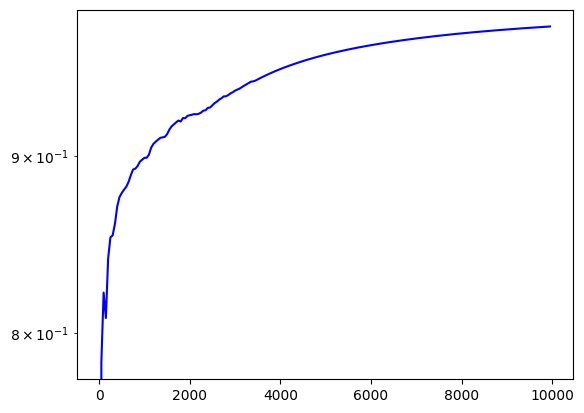

row[1]:  	| 
row[2]:  	| | | 
row[3]:  	| | | | | 
row[4]:  	| | | | | | | 
row[5]:  	| | | | | | | | | 

0: 1.0
50: 0.6862745098039216
100: 0.6831683168316832
150: 0.695364238410596
200: 0.7313432835820896
250: 0.7529880478087649
300: 0.770764119601329
350: 0.7777777777777778
400: 0.773067331670823
450: 0.7849223946784922
500: 0.7724550898203593
550: 0.7731397459165155
600: 0.7720465890183028
650: 0.7726574500768049
700: 0.7746077032810271
750: 0.7736351531291611
800: 0.7802746566791511
850: 0.781433607520564
900: 0.7835738068812431
950: 0.7791798107255521
1000: 0.7772227772227772
1050: 0.7830637488106565
1100: 0.7856494096276113
1150: 0.792354474370113
1200: 0.7960033305578684
1250: 0.7937649880095923
1300: 0.7947732513451191
1350: 0.7979274611398963
1400: 0.801570306923626
1450: 0.8042729152308753
1500: 0.8074616922051966
1550: 0.8085106382978723
1600: 0.8107432854465959
1650: 0.8128407026044822
1700: 0.8148148148148148
1750: 0.8172472872644203
1800: 0.818989450305386
1850: 0.820097

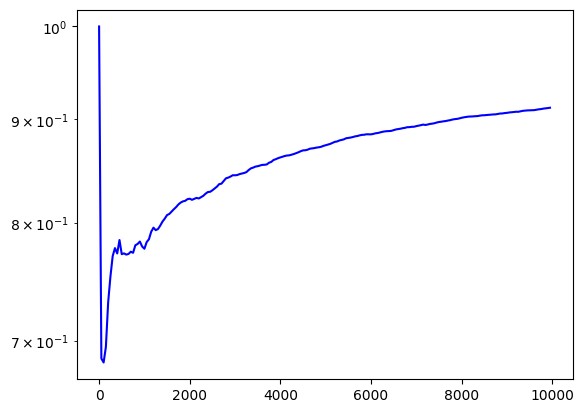

row[1]:  	| 
row[2]:  	| | | 
row[3]:  	| | | | | 
row[4]:  	| | | | | | | 
row[5]:  	| | | | | | | | | 

0: 0.0
50: 0.49019607843137253
100: 0.48514851485148514
150: 0.5298013245033113
200: 0.5323383084577115
250: 0.5378486055776892
300: 0.5448504983388704
350: 0.5612535612535613
400: 0.5760598503740648
450: 0.5831485587583148
500: 0.5828343313373253
550: 0.5898366606170599
600: 0.589018302828619
650: 0.5852534562211982
700: 0.5991440798858774
750: 0.6058588548601864
800: 0.6104868913857678
850: 0.618096357226792
900: 0.6159822419533851
950: 0.6203995793901157
1000: 0.6293706293706294
1050: 0.6336822074215034
1100: 0.631244323342416
1150: 0.6411815812337098
1200: 0.6469608659450458
1250: 0.6522781774580336
1300: 0.6556495003843198
1350: 0.6639526276831976
1400: 0.6673804425410421
1450: 0.6705720192970366
1500: 0.6755496335776149
1550: 0.6789168278529981
1600: 0.6808244846970644
1650: 0.6820109024833434
1700: 0.6848912404467961
1750: 0.683038263849229
1800: 0.6857301499167129
1850: 0.6

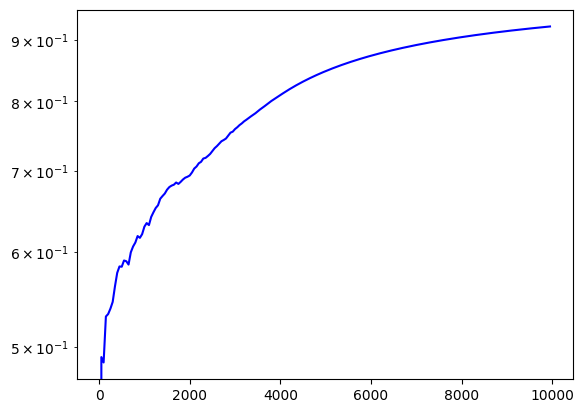

row[1]:  	| 
row[2]:  	| | | 
row[3]:  	| | | | | 
row[4]:  	| | | | | | | 
row[5]:  	| | | | | | | | | 

0: 0.0
50: 0.1568627450980392
100: 0.27722772277227725
150: 0.2781456953642384
200: 0.263681592039801
250: 0.2788844621513944
300: 0.26578073089701
350: 0.2792022792022792
400: 0.2793017456359102
450: 0.29711751662971175
500: 0.30538922155688625
550: 0.3157894736842105
600: 0.3261231281198003
650: 0.33947772657450076
700: 0.34236804564907275
750: 0.35019973368841545
800: 0.35081148564294634
850: 0.3595769682726204
900: 0.3706992230854606
950: 0.38275499474237645
1000: 0.38961038961038963
1050: 0.40532825880114176
1100: 0.40962761126248864
1150: 0.42224152910512597
1200: 0.4338051623646961
1250: 0.43884892086330934
1300: 0.441967717140661
1350: 0.4463360473723168
1400: 0.45467523197715914
1450: 0.461750516884907
1500: 0.46768820786142573
1550: 0.47259832366215343
1600: 0.4759525296689569
1650: 0.483343428225318
1700: 0.48736037624926515
1750: 0.49114791547687037
1800: 0.494725152692

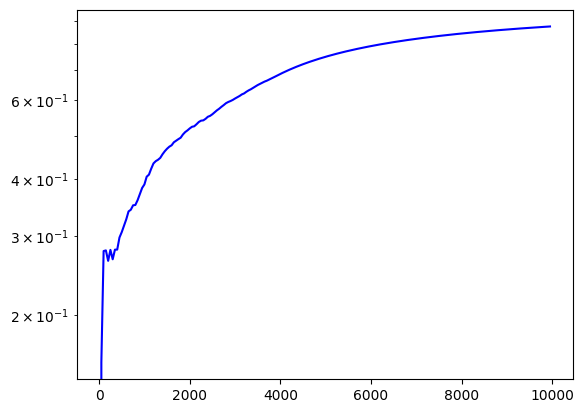

row[1]:  	| 
row[2]:  	| | | 
row[3]:  	| | | | | 
row[4]:  	| | | | | | | 
row[5]:  	| | | | | | | | | 

0: 0.0
50: 0.0
100: 0.0
150: 0.0
200: 0.0
250: 0.00398406374501992
300: 0.0033222591362126247
350: 0.002849002849002849
400: 0.0024937655860349127
450: 0.0022172949002217295
500: 0.001996007984031936
550: 0.003629764065335753
600: 0.0033277870216306157
650: 0.0030721966205837174
700: 0.0028530670470756064
750: 0.002663115845539281
800: 0.0024968789013732834
850: 0.0035252643948296123
900: 0.003329633740288568
950: 0.0031545741324921135
1000: 0.002997002997002997
1050: 0.003805899143672693
1100: 0.0036330608537693005
1150: 0.0034752389226759338
1200: 0.0033305578684429643
1250: 0.0031974420463629096
1300: 0.0030745580322828594
1350: 0.0029607698001480384
1400: 0.0028551034975017845
1450: 0.0027567195037904893
1500: 0.002664890073284477
1550: 0.0025789813023855577
1600: 0.0024984384759525295
1650: 0.0024227740763173833
1700: 0.0023515579071134627
1750: 0.002284408909194746
1800: 0.00

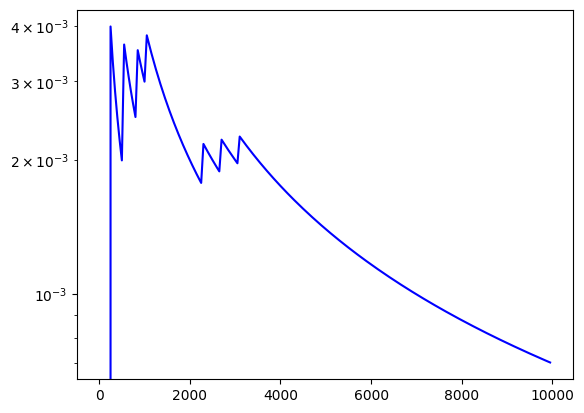

In [18]:
NIM_SIZE = 5
strategies = [level_zero, pure_random, level_two, level_three, expert_strategy]

reinforced_agent = None
for other_strategy in strategies:
    reinforced_agent = reinforcement_learning_nim(NIM_SIZE, other_strategy)

#### **Reinforce Agent with Nim(3)** while saving previous reinfoced agent

row[1]:  	| 
row[2]:  	| | | 
row[3]:  	| | | | | 

0: 0.0
50: 0.8235294117647058
100: 0.8415841584158416
150: 0.847682119205298
200: 0.8557213930348259
250: 0.8645418326693227
300: 0.8637873754152824
350: 0.8575498575498576
400: 0.8653366583541147
450: 0.8669623059866962
500: 0.8702594810379242
550: 0.8711433756805808
600: 0.870216306156406
650: 0.8740399385560675
700: 0.8773181169757489
750: 0.8788282290279628
800: 0.8813982521847691
850: 0.881316098707403
900: 0.8867924528301887
950: 0.889589905362776
1000: 0.8901098901098901
1050: 0.8943862987630827
1100: 0.8973660308810173
1150: 0.8992180712423979
1200: 0.9000832639467111
1250: 0.9008792965627498
1300: 0.9008455034588778
1350: 0.9037749814951888
1400: 0.9036402569593148
1450: 0.9055823569951758
1500: 0.9073950699533644
1550: 0.9090909090909091
1600: 0.9081823860087446
1650: 0.9085402786190188
1700: 0.9094650205761317
1750: 0.9120502569960023
1800: 0.9128262076624097
1850: 0.9135602377093462
1900: 0.9158337716991057
1950: 0.9179907

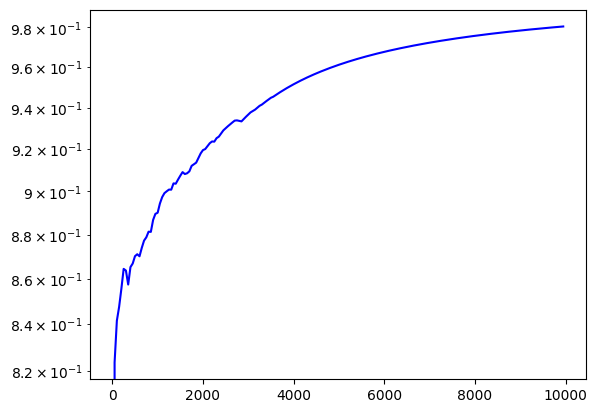

row[1]:  	| 
row[2]:  	| | | 
row[3]:  	| | | | | 

0: 0.9805019498050195
50: 0.9793055417371406
100: 0.9788139788139788
150: 0.9784257708600138
200: 0.978335457308107
250: 0.9783435762364647
300: 0.9783516163479273
350: 0.9783595787846585
400: 0.9781751754638977
450: 0.9781839058463305
500: 0.9780020950385677
550: 0.9770637854231826
600: 0.976605980567871
650: 0.9762463618439583
700: 0.9755163068872068
750: 0.9754441447307227
800: 0.9753726506804925
850: 0.9749331858814856
900: 0.9746812219062472
950: 0.9747968222080176
1000: 0.9744568675574947
1050: 0.9743009682381685
1100: 0.9744167192144851
1150: 0.9745314321585508
1200: 0.9746451209713418
1250: 0.9745800373300151
1300: 0.9744270418547031
1350: 0.9744515901682671
1400: 0.97456363476888
1450: 0.9746747008994847
1500: 0.9746978523606643
1550: 0.9748073759847632
1600: 0.9748297560555125
1650: 0.9747661144966098
1700: 0.974617554055209
1750: 0.9745553569908944
1800: 0.9745784255571561
1850: 0.9745169184035103
1900: 0.9745399546256617
1

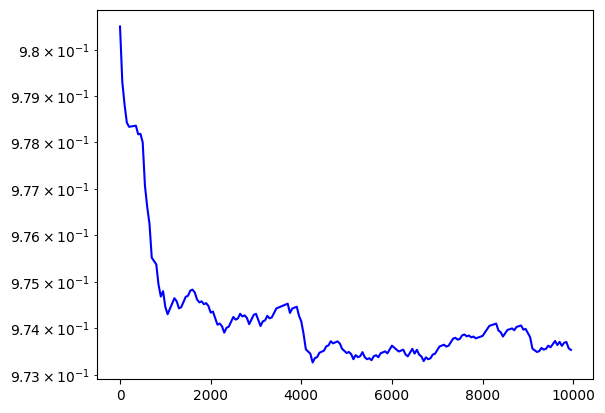

row[1]:  	| 
row[2]:  	| | | 
row[3]:  	| | | | | 

0: 0.9734013299335034
50: 0.9732182933519525
100: 0.9732849111984478
150: 0.9733511984516897
200: 0.9734171575664571
250: 0.9734827909732853
300: 0.9735481010787645
350: 0.9736130902658346
400: 0.9736777608940739
450: 0.9737421152999853
500: 0.9738061557972781
550: 0.9738698846771446
600: 0.9739333042085335
650: 0.9739964166384194
700: 0.974059224192068
750: 0.9741217290732976
800: 0.9741839334647373
850: 0.9742458395280802
900: 0.9743074494043347
950: 0.9743687652140709
1000: 0.974429789057664
1050: 0.9744905230155337
1100: 0.9745509691483816
1150: 0.9746111294974232
1200: 0.9746710060846187
1250: 0.9747306009128982
1300: 0.9747899159663865
1350: 0.9748489532106225
1400: 0.974907714592776
1450: 0.9749662020418628
1500: 0.975024417468955
1550: 0.975082362767389
1600: 0.9751400398129716
1650: 0.9751974504641818
1700: 0.9752545965623703
1750: 0.9753114799319571
1800: 0.9753681023806248
1850: 0.9754244656995104
1900: 0.9754805716633944
1

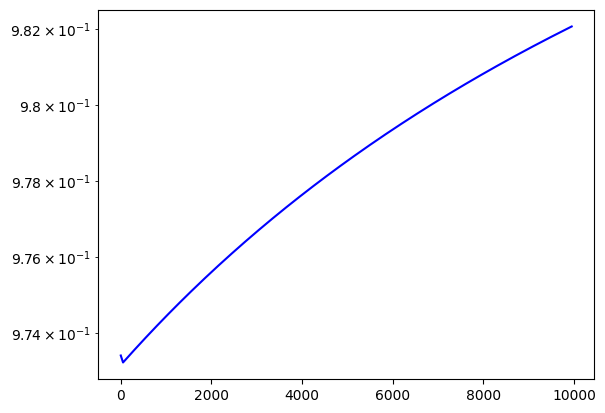

row[1]:  	| 
row[2]:  	| | | 
row[3]:  	| | | | | 

0: 0.9821005966467784
50: 0.9820638248311204
100: 0.9820936181522208
150: 0.9821233126596133
200: 0.982152908844078
250: 0.9821824071931506
300: 0.9822118081911488
350: 0.9822411123191988
400: 0.9822703200552614
450: 0.9822994318741585
500: 0.9823284482475985
550: 0.9823573696442015
600: 0.9823861965295252
650: 0.9824149293660892
700: 0.9824435686134002
750: 0.9824721147279764
800: 0.9825005681633713
850: 0.9825289293701986
900: 0.9825571987961554
950: 0.9825853768860456
1000: 0.9826134640818038
1050: 0.9826414608225178
1100: 0.982669367544452
1150: 0.9826971846810696
1200: 0.9827249126630556
1250: 0.9827525519183387
1300: 0.9827801028721127
1350: 0.9828075659468597
1400: 0.9828349415623706
1450: 0.9828622301357668
1500: 0.9828894320815212
1550: 0.9829165478114799
1600: 0.9829435777348818
1650: 0.9829705222583804
1700: 0.9829973817860636
1750: 0.9830241567194734
1800: 0.9830508474576272
1850: 0.9830774543970362
1900: 0.983103977931726

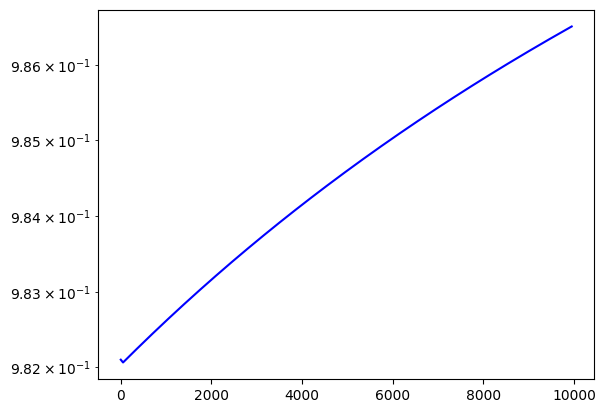

row[1]:  	| 
row[2]:  	| | | 
row[3]:  	| | | | | 

0: 0.9865003374915627
50: 0.9858929864422861
100: 0.9852871499463853
150: 0.9846828223456452
200: 0.9840799980099998
250: 0.9834786713373581
300: 0.9828788367534305
350: 0.982280488711556
400: 0.9816836216925323
450: 0.9810882302044449
500: 0.9804943087824992
550: 0.9799018519888535
600: 0.9793108544124529
650: 0.9787213106688643
700: 0.978133215400113
750: 0.9775465632745208
800: 0.9769613489865444
850: 0.9763775672566155
900: 0.9757952128309821
950: 0.9752142804815511
1000: 0.9746347650057315
1050: 0.9740566612262795
1100: 0.9734799639911438
1150: 0.9729046681733129
1200: 0.9723307686706634
1250: 0.9717582604058084
1300: 0.9711871383259485
1350: 0.970617397402723
1400: 0.970049032632062
1450: 0.9694820390340402
1500: 0.9689164116527312
1550: 0.9683521455560636
1600: 0.967789235835677
1650: 0.9672276776067802
1700: 0.9666674660080093
1750: 0.9661085962012886
1800: 0.9655510633716897
1850: 0.9649948627272944
1900: 0.9644399894990573
1

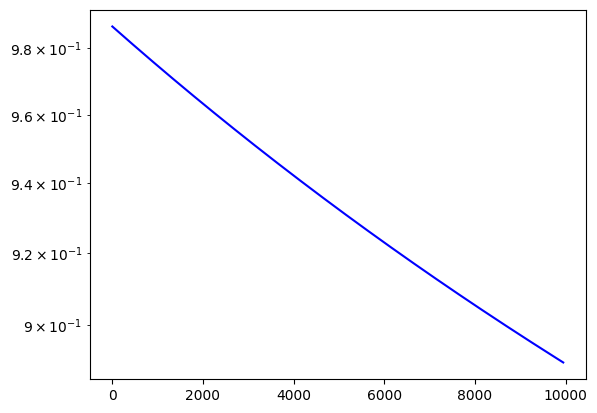

In [19]:
NIM_SIZE = 3
strategies = [level_zero, pure_random, level_two, level_three, expert_strategy]

reinforced_agent = None
for other_strategy in strategies:
    reinforced_agent = reinforcement_learning_nim(NIM_SIZE, other_strategy, reinforced_agent)

#### **Reinforce Agent with Nim(5)** while saving previous reinfoced agent

row[1]:  	| 
row[2]:  	| | | 
row[3]:  	| | | | | 
row[4]:  	| | | | | | | 
row[5]:  	| | | | | | | | | 

0: 0.0
50: 0.803921568627451
100: 0.801980198019802
150: 0.847682119205298
200: 0.835820895522388
250: 0.8326693227091634
300: 0.840531561461794
350: 0.8490028490028491
400: 0.85785536159601
450: 0.8603104212860311
500: 0.8622754491017964
550: 0.8693284936479129
600: 0.8768718801996672
650: 0.8847926267281107
700: 0.8830242510699001
750: 0.8854860186418109
800: 0.885143570536829
850: 0.8836662749706228
900: 0.8867924528301887
950: 0.8906414300736067
1000: 0.8941058941058941
1050: 0.8962892483349191
1100: 0.8991825613079019
1150: 0.9009556907037359
1200: 0.9042464612822648
1250: 0.9048760991207034
1300: 0.90315142198309
1350: 0.9030347890451518
1400: 0.9050678087080657
1450: 0.906960716747071
1500: 0.9093937375083277
1550: 0.9103803997421018
1600: 0.9106808244846971
1650: 0.9115687462144155
1700: 0.9112286890064668
1750: 0.910908052541405
1800: 0.9111604664075513
1850: 0.91139924365

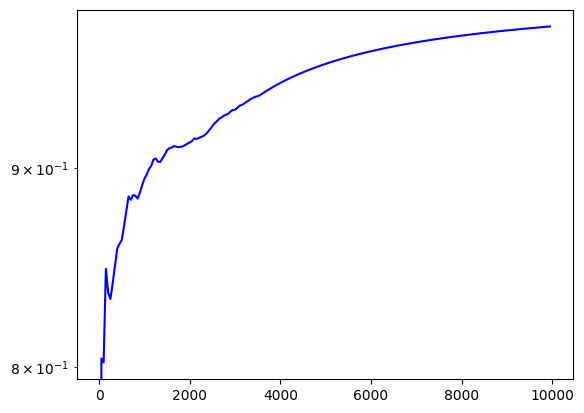

row[1]:  	| 
row[2]:  	| | | 
row[3]:  	| | | | | 
row[4]:  	| | | | | | | 
row[5]:  	| | | | | | | | | 

0: 0.9785021497850215
50: 0.9780121380957119
100: 0.9773289773289773
150: 0.9770465963944439
200: 0.976766983629056
250: 0.9762949956101844
300: 0.9757305116008155
350: 0.975557917109458
400: 0.9753869820209595
450: 0.9754090517653813
500: 0.9753356823159699
550: 0.9751682304994788
600: 0.9750966889916046
650: 0.9748380433762088
700: 0.9743949163629567
750: 0.9741419402846246
800: 0.9739838903805204
850: 0.9738272970233158
900: 0.9737638748738647
950: 0.9737010318692357
1000: 0.9730024543223343
1050: 0.9727626459143969
1100: 0.9727051616971444
1150: 0.9726481929871761
1200: 0.9725024551379341
1250: 0.9725357745978135
1300: 0.9720378727546235
1350: 0.9716324552902827
1400: 0.9710551705990702
1450: 0.9710942275783775
1500: 0.9710459960003478
1550: 0.9710847545667042
1600: 0.9706921817084734
1650: 0.9705604669127114
1700: 0.970600803350141
1750: 0.970385499106459
1800: 0.9702567579018

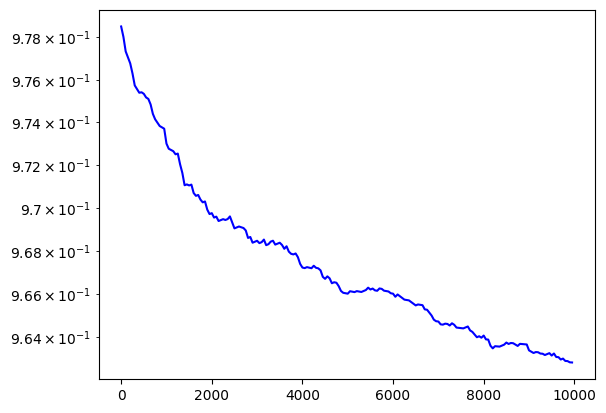

row[1]:  	| 
row[2]:  	| | | 
row[3]:  	| | | | | 
row[4]:  	| | | | | | | 
row[5]:  	| | | | | | | | | 

0: 0.9628518574071296
50: 0.9629444915465563
100: 0.9630366648425451
150: 0.9631283807255223
200: 0.9632196425919509
250: 0.9633104538047503
300: 0.9634008176937097
350: 0.9634907375558941
400: 0.9635802166560463
450: 0.9636692582269816
500: 0.9637578654699771
550: 0.9638460415551555
600: 0.963933789621863
650: 0.9640211127790421
700: 0.9641080141055988
750: 0.9641944966507638
800: 0.9642805634344502
850: 0.9643662174476044
900: 0.9644514616525525
950: 0.964536298983342
1000: 0.9646207323460788
1050: 0.964704764619258
1100: 0.9647883986540923
1150: 0.9648716372748334
1200: 0.9649544832790906
1250: 0.9650369394381441
1300: 0.9651190084972536
1350: 0.9652006931759637
1400: 0.9652819961684034
1450: 0.965362920143583
1500: 0.9654434677456862
1550: 0.9655236415943576
1600: 0.9656034442849868
1650: 0.9656828783889889
1700: 0.9657619464540804
1750: 0.9658406510045515
1800: 0.9659189945415

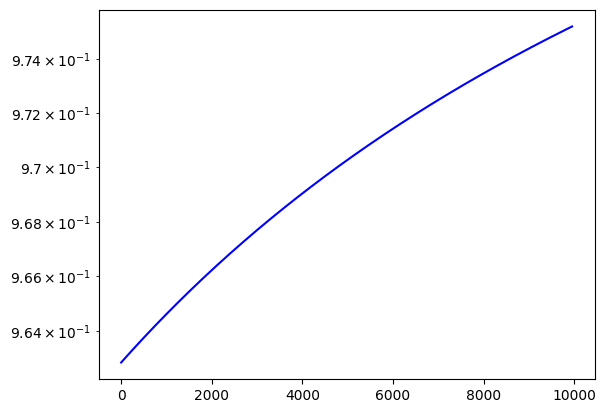

row[1]:  	| 
row[2]:  	| | | 
row[3]:  	| | | | | 
row[4]:  	| | | | | | | 
row[5]:  	| | | | | | | | | 

0: 0.975200826639112
50: 0.9744434461415593
100: 0.9739211321882993
150: 0.9735332161454014
200: 0.9735770338730506
250: 0.9736207067534958
300: 0.9736642355037788
350: 0.9737076208362163
400: 0.9737508634584389
450: 0.9737939640734294
500: 0.9738369233795613
550: 0.973879742070636
600: 0.9739224208359204
650: 0.973964960360184
700: 0.9740073613237353
750: 0.9740496244024585
800: 0.9740917502678484
850: 0.9741337395870474
900: 0.9741755930228795
950: 0.9742173112338858
1000: 0.9742588948743589
1050: 0.974300344594377
1100: 0.974341661039838
1150: 0.9743828448524927
1200: 0.9744238966699785
1250: 0.974464817125852
1300: 0.9745056068496214
1350: 0.9745462664667793
1400: 0.9745867965988344
1450: 0.974627197863343
1500: 0.9746674708739405
1550: 0.9747076162403727
1600: 0.9747476345685263
1650: 0.9747875264604594
1700: 0.9748272925144317
1750: 0.9748669333249347
1800: 0.9749064494827206

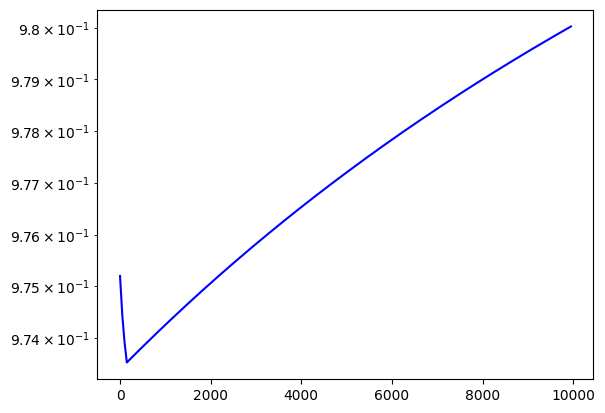

row[1]:  	| 
row[2]:  	| | | 
row[3]:  	| | | | | 
row[4]:  	| | | | | | | 
row[5]:  	| | | | | | | | | 

0: 0.9800254993625159
50: 0.9788020274150458
100: 0.9775816064437296
150: 0.9763891310303604
200: 0.9751996218999527
250: 0.9740130679983106
300: 0.9728046450460286
350: 0.9715992168719486
400: 0.9703967723571199
450: 0.9691973004375665
500: 0.968000790103948
550: 0.9668072304012232
600: 0.9656166104283146
650: 0.9644289193377776
700: 0.9632441463354708
750: 0.9620622806802287
800: 0.9608833116835371
850: 0.9597072287092115
900: 0.9585340211730764
950: 0.9573636785426485
1000: 0.956196190336821
1050: 0.9550315461255512
1100: 0.9538697355295491
1150: 0.9527107482199704
1200: 0.9515545739181088
1250: 0.9504012023950934
1300: 0.9492506234715866
1350: 0.9481028270174845
1400: 0.9469578029516196
1450: 0.9458155412414658
1500: 0.9446760319028458
1550: 0.943539264999639
1600: 0.9424052306434941
1650: 0.9412739189935416
1700: 0.940145320256109
1750: 0.9390194246844387
1800: 0.9378962225784

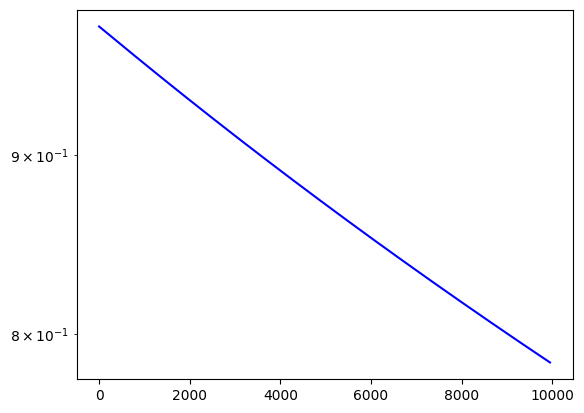

In [20]:
NIM_SIZE = 5
strategies = [level_zero, pure_random, level_two, level_three, expert_strategy]

reinforced_agent = None
for other_strategy in strategies:
    reinforced_agent = reinforcement_learning_nim(NIM_SIZE, other_strategy, reinforced_agent)

## ***RL strategy***

In [4]:
def rl_strategy(nim: NimBoard, robot: Agent) -> Nimply:
    state, _ = nim.get_state_and_reward()  # get the current state
    return robot.choose_action(state)

### Evaluation functions modified specifically for a RL Agent

In [11]:
from typing import Callable

# Play Game with RL Agent
def play_nim_rl(num_of_heaps: int, a: Callable, b: Callable, robot: Agent, robo_first=True, k = None, display_board=False) -> None:
    nim = NimBoard(num_of_heaps, k)
    if display_board:
        nim.display_board()
    strategies = (a, b)
    
    players = ['a', 'b']
    turn = 0
    while not game_over(nim, players, turn):
        if robo_first and turn == 0:
            ply = strategies[turn](nim, robot)
        elif not robo_first and turn == 1:
            ply = strategies[turn](nim, robot)
        else:
            ply = strategies[turn](nim)
        nim.nimming(ply)
        if display_board:
            nim.display_board()
        turn = (turn + 1) % 2
    return nim.winner

# Evaluate Ten Games wth RL Agent
NUM_MATCHES = 10
def evaluate_rl(strategy: Callable, other_strategy: Callable, robot: Agent, k=None, nim_size=10) -> float:
    won_1 = 0
    won_2 = 0

    for _ in range(NUM_MATCHES):
        winner_first = play_nim_rl(nim_size, strategy, other_strategy, robot, True, k)
        winner_second = play_nim_rl(nim_size, other_strategy, strategy, robot, False, k)
        if winner_first == 0:
            won_1 += 1
        if winner_second == 1:
            won_2 += 1
    return won_1 / NUM_MATCHES, won_2 / NUM_MATCHES



#### **Note**: the following cells should be executed after the corresponding RL approach has been executed an not in the order they appear

### Evaluate Reinforced agent for Nim(3) w/o incremental learning

In [13]:
print(evaluate_rl(rl_strategy, pure_random, k=None, robot=reinforced_agent, nim_size=3))
print(evaluate_rl(rl_strategy, level_three, k=None, robot=reinforced_agent ,nim_size=3))
print(evaluate_rl(rl_strategy, expert_strategy, k=None, robot=reinforced_agent, nim_size=3))

(1.0, 1.0)
(1.0, 0.0)
(1.0, 0.0)


### Evaluate Reinforced agent for Nim(3) with incremental learning

In [15]:
print(evaluate_rl(rl_strategy, pure_random, k=None, robot=reinforced_agent, nim_size=3))
print(evaluate_rl(rl_strategy, level_three, k=None, robot=reinforced_agent ,nim_size=3))
print(evaluate_rl(rl_strategy, expert_strategy, k=None, robot=reinforced_agent, nim_size=3))

(1.0, 1.0)
(1.0, 0.0)
(1.0, 0.0)


### Evaluate Reinforced agent for Nim(5) w/o incremental learning

In [17]:
print(evaluate_rl(rl_strategy, pure_random, k=None, robot=reinforced_agent, nim_size=5))
print(evaluate_rl(rl_strategy, level_three, k=None, robot=reinforced_agent ,nim_size=5))
print(evaluate_rl(rl_strategy, expert_strategy, k=None, robot=reinforced_agent, nim_size=5))

(0.9, 0.8)
(1.0, 1.0)
(0.0, 0.0)


### Evaluate Reinforced agent for Nim(5) with incremental learning

In [19]:
print(evaluate_rl(rl_strategy, pure_random, k=None, robot=reinforced_agent, nim_size=5))
print(evaluate_rl(rl_strategy, level_three, k=None, robot=reinforced_agent ,nim_size=5))
print(evaluate_rl(rl_strategy, expert_strategy, k=None, robot=reinforced_agent, nim_size=5))

(1.0, 0.9)
(1.0, 0.0)
(0.0, 0.0)
